# 97. İçsel Boyutlandrıma

- Veri setinde yer alan birden fazla veri aslında tek bir veri ile temsil edilebilir.
    + Boy ve kilo: Vücut Kitle İndeksi (BMS)
    + Enlem ve boylam değişimi: Alınan mesafe
- İçsel boyut(intrinsic dimension): Veri setinde bulunması gereken feature sayısı
    + Boyut azaltmanın temelinde ki mantık
    + Bir veri setinin en az sayıda veri ile temsil edilmesi
    

In [3]:
import numpy as np
data = np.loadtxt('seeds_dataset.txt')
area = data[:,0]
lenght = data[:,3]
width = data[:,4]
geometry = data[:,3:5]

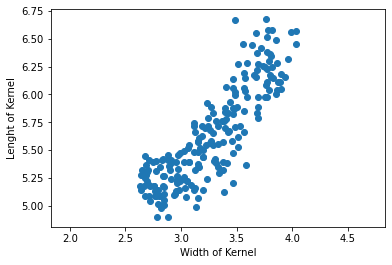

0.8604149377143469


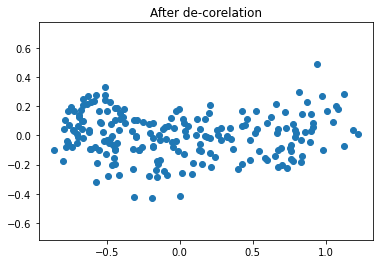

-6.938893903907228e-18


In [7]:
import matplotlib.pyplot as plt
plt.scatter(width, lenght)
plt.xlabel('Width of Kernel')
plt.ylabel('Lenght of Kernel')
plt.axis('equal')
plt.show()

from scipy.stats import pearsonr
correlation, pvalue = pearsonr(lenght, width)
print(correlation)

from sklearn.decomposition import PCA
model = PCA()
pca_features = model.fit_transform(geometry)
x = pca_features[:,0]
y = pca_features[:,1]
plt.axis('equal')
plt.title('After de-corelation')
plt.scatter(x, y)
plt.show()
correlation, pvalue = pearsonr(x, y)
print(correlation)

In [8]:
# Varyansın yönelimini belirlemek
print(model.components_)

[[ 0.76912343  0.63910027]
 [ 0.63910027 -0.76912343]]


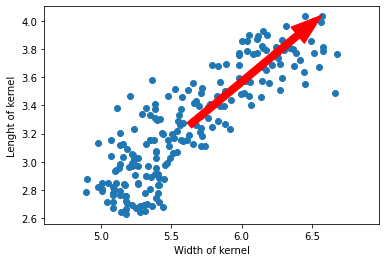

In [13]:
model = PCA()
model.fit(geometry)
mean = model.mean_
start = model.components_[0,:]

plt.scatter(geometry[:,0], geometry[:,1])
plt.xlabel('Width of kernel')
plt.ylabel('Lenght of kernel')
plt.axis('equal')

plt.arrow(mean[0], mean[1], start[0], start[1], color = 'red', width = 0.05)

plt.show()

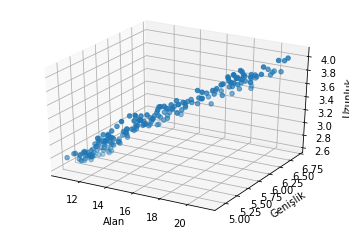

In [18]:
# 3 Boyutlu Dağılım Grafiği

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
x = fig.add_subplot(projection = '3d')
x.scatter(area, lenght, width)
x.set_xlabel('Alan')
x.set_ylabel('Genişlik')
x.set_zlabel('Uzunluk')

plt.show()

In [21]:
# Varyansların Dağılımını/Etkisini Belirlemek

data2 = data[:,0:7]

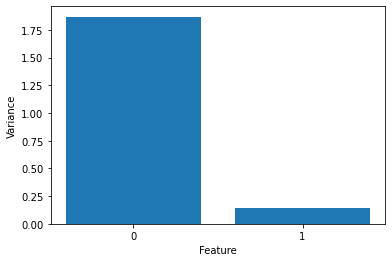

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(geometry)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('Feature')
plt.xticks(features)
plt.ylabel('Variance')
plt.show()

In [28]:
geometry

array([[5.763, 3.312],
       [5.554, 3.333],
       [5.291, 3.337],
       [5.324, 3.379],
       [5.658, 3.562],
       [5.386, 3.312],
       [5.563, 3.259],
       [5.42 , 3.302],
       [6.053, 3.465],
       [5.884, 3.505],
       [5.714, 3.242],
       [5.438, 3.201],
       [5.439, 3.199],
       [5.479, 3.156],
       [5.482, 3.114],
       [5.351, 3.333],
       [5.119, 3.383],
       [5.527, 3.514],
       [5.205, 3.466],
       [5.226, 3.049],
       [5.658, 3.129],
       [5.52 , 3.168],
       [5.618, 3.507],
       [5.099, 2.936],
       [5.789, 3.245],
       [5.833, 3.421],
       [5.395, 3.026],
       [5.395, 2.956],
       [5.541, 3.221],
       [5.516, 3.065],
       [5.454, 2.975],
       [5.757, 3.371],
       [5.717, 3.186],
       [5.585, 3.15 ],
       [5.712, 3.328],
       [5.709, 3.485],
       [5.826, 3.464],
       [5.832, 3.683],
       [5.656, 3.288],
       [5.397, 3.298],
       [5.348, 3.156],
       [5.351, 3.158],
       [5.138, 3.201],
       [5.8

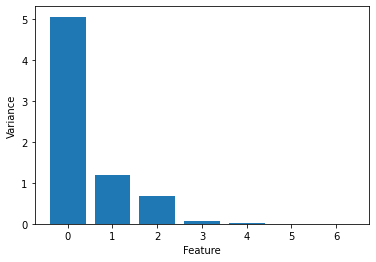

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(data2)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('Feature')
plt.xticks(features)
plt.ylabel('Variance')
plt.show()